Antes de comenzar el análisis exploratorio de datos (EDA), se realizó un preprocesado fundamental sobre los datos extraídos de OpenStreetMap. En particular, se trabajó sobre la columna tags, que en su formato original almacenaba información semántica como un campo anidado (en forma de diccionario JSON o texto clave-valor).
Para permitir un análisis más claro, directo y visualizable, la columna tags fue expandida en columnas individuales: cada clave del diccionario pasó a ser una variable propia, y sus valores quedaron reflejados directamente en las filas correspondientes. Por ejemplo, entradas como "historic"=>"castle" o "wikidata"=>"Q123456" pasaron a formar parte de las columnas historic y wikidata respectivamente.
Esta expansión se aplicó a todas las tablas (points, lines, polygons, nodes, etc.) y permitió:
Convertir datos implícitos en columnas explícitas.
Medir la cobertura de cada atributo.
Identificar etiquetas útiles, frecuentes o prescindibles.
Preparar las tablas para un análisis temático, geográfico y visual más rico.

Este bloque inicial carga los conjuntos de datos expandidos, previamente procesados desde OpenStreetMap y almacenados como archivos CSV. Los archivos corresponden a las diferentes geometrías (puntos, líneas, polígonos) y estructuras (relaciones, nodos, carreteras).
Se define un diccionario con las rutas a cada archivo, y se utiliza una estructura iterativa para leerlos todos y almacenarlos en un diccionario Python (tablas) con clave el nombre de la capa (points, nodes, etc.) y valor el correspondiente DataFrame. Esto permite gestionar y analizar cada tabla de forma ordenada a lo largo del EDA.

In [2]:
import pandas as pd
import os

# Ruta base a la carpeta EDA
base = "/Users/severinodonate/Downloads/EDA/"

# Diccionario con nombres reales de los archivos
archivos = {
    "points": os.path.join(base, "planet_osm_point_expandido.csv"),
    "lines": os.path.join(base, "planet_osm_lines_expandido.csv"),
    "polygons": os.path.join(base, "planet_osm_polygons_expandido.csv"),
    "roads": os.path.join(base, "planet_osm_roads_expandido.csv"),
    "nodes": os.path.join(base, "planet_osm_nodes_expandido_TOTAL.csv"),
    "rels": os.path.join(base, "planet_osm_Rels_expandido.csv"),
    "rels_ways": os.path.join(base, "planet_osm_rels_ways_expandido.csv"),
}

tablas = {}

# Leer cada archivo en un diccionario
for nombre, ruta in archivos.items():
    print(f"▶ Cargando: {nombre}")
    tablas[nombre] = pd.read_csv(ruta, sep=";", quotechar='"')


▶ Cargando: points


/var/folders/59/2dj5q51d63d6npy9bjv7ms0w0000gn/T/ipykernel_68902/170381287.py:23: DtypeWarning: Columns (1,2,3,8,9,10,11,12,13,14,15,17,18,20,21,22,23,24,25,27,28,30,31,33,35,37,38,39,40,41,42,43,44,45,47,49,50,51,52,55,56,57,58,59,60,61,62,63,64,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,121,122,123,124,125,126,127,128,129,130,131,132,133,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,158,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,27

▶ Cargando: lines


/var/folders/59/2dj5q51d63d6npy9bjv7ms0w0000gn/T/ipykernel_68902/170381287.py:23: DtypeWarning: Columns (17,31,33,36,37,41,43,48,51,54,64,72,73,74,80,84,86,87,88,89,90,91,93,95,96,97,98,100,101,103,105,107,108,109,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,128,130,131,132,133,134,135,136,137,138,139,141,144,147,148,149,150,151,153,154,155,156,159,160,161,162,163,164,165,166,167,168,170,171,172,173,174,175,176,177,178,179,180,181,183,184,185,186,187,188,190,191,193,194,195,196,198,199,200,201,202,204,205,206,207,208,209,210,211,212,213,215,216,217,218,219,220,221,222,224,225,226,227,228,229,230,231,232,233,234,237,238,240,241,242,244,245,246,247,248,249,250,251,252,253,254,255,257,258,259,260,261,262,264,265,266,267,268,271,272,273,274,279,280,281,282,283,284,286,287,288,289,290,291,292,295,296,299,300,301,302,303,304,305,306,307,308,309,310,312,313,314,315,316,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,345,34

▶ Cargando: polygons


/var/folders/59/2dj5q51d63d6npy9bjv7ms0w0000gn/T/ipykernel_68902/170381287.py:23: DtypeWarning: Columns (1,2,3,4,7,8,9,10,11,13,14,15,16,17,19,20,21,22,23,26,28,29,31,33,35,36,39,41,42,43,48,49,50,51,54,55,56,57,58,60,61,62,63,64,70,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,121,122,124,125,126,127,128,129,130,131,132,133,135,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,153,154,155,157,158,159,160,161,162,163,164,165,166,167,168,170,171,172,173,174,175,177,179,180,181,182,183,186,187,188,189,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,2

▶ Cargando: roads
▶ Cargando: nodes


/var/folders/59/2dj5q51d63d6npy9bjv7ms0w0000gn/T/ipykernel_68902/170381287.py:23: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,21,22,23,24,25,26,27,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,83,84,85,86,87,89,90,91,92,93,96,97,98,99,100,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,148,149,150,151,152,154,155,156,157,158,159,160,162,164,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,213,214,215,216,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,234,235,236,237,240,242,243,244,245,247,248,249,250,251,252,253,254,255,256,257,259,260,261,262,263,264,265,266,268,270,271,273,274,275,276,277,278,281

▶ Cargando: rels
▶ Cargando: rels_ways


/var/folders/59/2dj5q51d63d6npy9bjv7ms0w0000gn/T/ipykernel_68902/170381287.py:23: DtypeWarning: Columns (3,5,6,7,10,11,12,15,16,17,18,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,49,51,52,53,55,56,57,58,59,60,61,62,64,65,66,67,68,69,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,89,90,91,93,94,96,97,98,100,101,102,103,104,105,106,107,108,109,110,111,112,113,115,116,117,118,119,120,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,189,190,191,192,193,194,195,196,199,200,201,202,203,204,205,206,207,209,210,211,212,213,214,215,216,217,218,219,220,221,222,224,225,226,227,228,229,231,232,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,257,258,259,260,262,263,264,265,266,267,268,269,270,272,273,274,275,276,277,278,279,

Ese bloque construye el DataFrame resumen_completo en memoria. Es como preparar una tabla resumen, pero sin imprimirla todavía.
Este bloque calcula la cobertura de datos en cada tabla. Para cada dataset (points, lines, polygons, etc.), se calcula el número total de valores no nulos por variable, así como el porcentaje de cobertura sobre el total de filas de la tabla.
El resultado se organiza en un DataFrame (resumen_completo) que consolida la información de todas las tablas, indicando por cada variable:
La cantidad de valores presentes (valores)
El porcentaje de completitud (porcentaje)
La tabla de origen (tabla)
Este resumen permite identificar fácilmente qué variables están más completas y cuáles tienen poca utilidad analítica, y será usado en visualizaciones posteriores para facilitar la toma de decisiones sobre limpieza y uso de atributos.

In [4]:
resumen_total = []

for nombre, df in tablas.items():
    total_filas = len(df)
    cobertura = df.notna().sum().reset_index()
    cobertura.columns = ["variable", "valores"]
    cobertura["porcentaje"] = (cobertura["valores"] / total_filas * 100).round(2)
    cobertura["tabla"] = nombre
    resumen_total.append(cobertura)

resumen_completo = pd.concat(resumen_total, ignore_index=True)


In [6]:
# Mostrar primeras filas del resumen
resumen_completo.head(15)

,variable,valores,porcentaje,tabla
0,osm_id,148537,100.00,points
1,access,13463,9.06,points
2,addr:housename,34,0.02,points
3,addr:housenumber,152,0.10,points
4,addr:interpolation,0,0.00,points
5,admin_level,2,0.00,points
6,aerialway,0,0.00,points
7,aeroway,0,0.00,points
8,amenity,146,0.10,points
9,area,19,0.01,points


In [ ]:
### !pip install matplotlib seaborn

Este bloque genera una visualización comparativa de la cobertura de datos por variable, desglosada por tabla (points, nodes, polygons, etc.).
Para ello, se seleccionan las 20 variables más comunes en el conjunto (top_variables) y se construye un gráfico de barras horizontales que muestra el porcentaje de cobertura de cada una en cada tabla.
Esta representación permite identificar qué atributos están más presentes y en qué tipo de geometría son más frecuentes, lo que resulta útil para priorizar variables en el análisis temático y descartar aquellas con cobertura limitada o redundante.

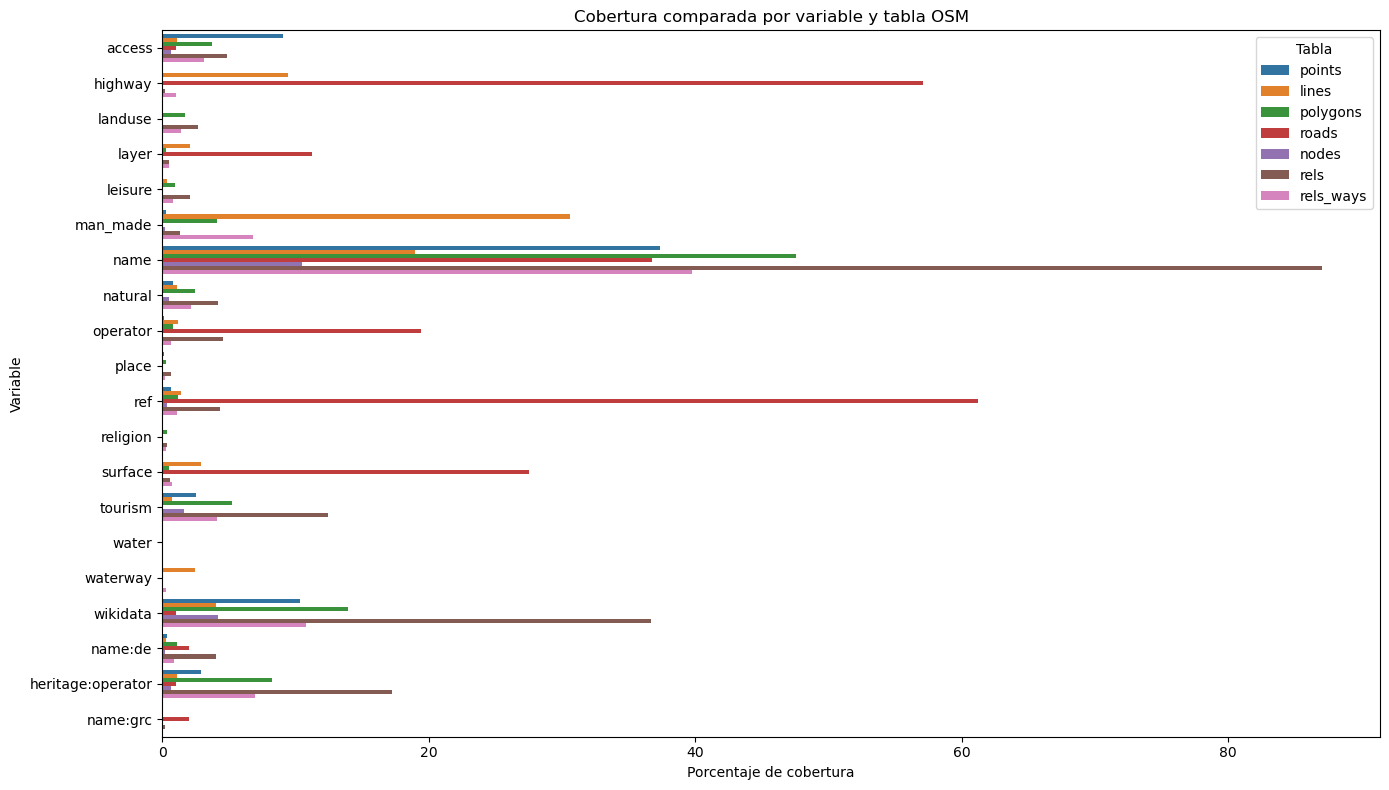

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las variables más comunes (las que aparecen en más de una tabla)
top_variables = resumen_completo["variable"].value_counts().head(20).index
df_plot = resumen_completo[resumen_completo["variable"].isin(top_variables)]

plt.figure(figsize=(14, 8))
sns.barplot(data=df_plot, x="porcentaje", y="variable", hue="tabla")
plt.title("Cobertura comparada por variable y tabla OSM")
plt.xlabel("Porcentaje de cobertura")
plt.ylabel("Variable")
plt.legend(title="Tabla")
plt.tight_layout()
plt.show()


Este bloque analiza la tabla nodes para identificar las etiquetas (tags) más utilizadas. Para ello:
Se excluyen las columnas estructurales (osm_id, way, geom, etc.).
Se consideran únicamente las columnas derivadas de los tags de OpenStreetMap, que son aquellas creadas al expandir el campo tags.
Se calcula cuántas veces aparece información (valor no nulo) en cada una de estas columnas.
El resultado es una lista de las etiquetas más utilizadas en la tabla nodes, ordenadas por frecuencia de aparición. Esto permite conocer qué atributos son más comunes entre los nodos y priorizar su análisis o visualización en el resto del estudio.

In [7]:
### Para obtener las etiquetas mas comunes en tabla Nodes

# Seleccionar tabla
df = tablas["nodes"] ### Cambiar para seleccionar la tabla deseada

# Filtrar solo columnas que vienen de tags (descartamos geométricas y estructurales)
excluir = ["osm_id", "way", "geom", "way_area", "tags"]
tag_columns = [col for col in df.columns if col not in excluir and not col.startswith("Unnamed")]

# Calcular frecuencia de presencia de cada tag (columna no nula)
frecuencia_tags = (
    df[tag_columns].notna()
    .sum()
    .reset_index()
    .rename(columns={"index": "tag", 0: "conteo"})
    .sort_values(by="conteo", ascending=False)
)

# Mostrar top 20
frecuencia_tags.head(20)


,tag,conteo
0,id,18305
2,lon,18305
1,lat,18305
4,historic,2669
3,name,1919
5,archaeological_site,1502
6,source,998
8,wikidata,763
9,wikipedia,523
48,megalith_type,425


Este bloque genera una matriz binaria que indica la presencia o ausencia de cada variable (columna) en las diferentes tablas del conjunto de datos de OpenStreetMap.
Para ello:
Se recorre cada tabla y se registra qué variables contiene.
Se construye un DataFrame en el que cada fila representa una variable y cada columna representa una tabla (points, nodes, etc.).
El valor 1 indica que la variable está presente en la tabla correspondiente, mientras que 0 indica su ausencia.
Esta matriz resulta útil para identificar:
Variables comunes a múltiples tablas.
Variables exclusivas de una geometría o tipo de entidad.
Redundancias o inconsistencias en el etiquetado.

In [11]:
## Que columnas estan presentes encada tabla

import pandas as pd

# Matriz de presencia de variables
presencia = {}

for nombre, df in tablas.items():
    for col in df.columns:
        presencia.setdefault(col, {})[nombre] = 1

# Rellenar los faltantes con 0
df_presencia = pd.DataFrame(presencia).T.fillna(0).astype(int)
df_presencia.head(20)


,points,lines,polygons,roads,nodes,rels,rels_ways
osm_id,1,1,1,1,0,0,0
access,1,1,1,1,1,1,1
addr:housename,1,1,1,1,1,1,1
addr:housenumber,1,1,1,1,1,1,1
addr:interpolation,1,1,1,1,0,0,1
admin_level,1,1,1,1,1,1,1
aerialway,1,1,1,1,0,0,0
aeroway,1,1,1,1,0,0,1
amenity,1,1,1,1,1,1,1
area,1,1,1,1,1,1,1


Este bloque calcula cuántas variables distintas existen en total entre todas las tablas del conjunto de datos. Para ello:
Se recorre cada tabla (points, nodes, polygons, etc.).
Se agrega cada nombre de columna a un conjunto (set) que elimina automáticamente duplicados.
Se obtiene así el número total de columnas únicas, lo que permite estimar la diversidad de atributos disponibles.
Esta métrica da una idea general del tamaño y complejidad del modelo de datos resultante tras expandir las etiquetas (tags) de OpenStreetMap.

In [8]:
## Columnas unicas en todas las tablas

# Obtener conjunto único de todas las columnas de todas las tablas
todas_las_columnas = set()

for df in tablas.values():
    todas_las_columnas.update(df.columns)

print(f"Número total de columnas únicas combinadas: {len(todas_las_columnas)}")


Número total de columnas únicas combinadas: 1948


Este bloque genera un resumen del número total de columnas por tabla del conjunto de datos. En lugar de imprimir los resultados como texto plano, se organiza la información en una tabla ordenada que facilita la lectura y comparación entre tablas. Esta métrica ayuda a visualizar qué tablas contienen mayor diversidad de variables y por tanto requieren más atención en fases posteriores del análisis.

In [10]:
# Crear resumen del número de columnas por tabla
resumen_columnas = []

for nombre, df in tablas.items():
    resumen_columnas.append({
        "tabla": nombre,
        "n_columnas": len(df.columns)
    })

# Convertir a DataFrame
df_resumen_columnas = pd.DataFrame(resumen_columnas).sort_values(by="n_columnas", ascending=False)

# Mostrar tabla
df_resumen_columnas


,tabla,n_columnas
6,rels_ways,1328
2,polygons,1244
4,nodes,1229
0,points,1174
5,rels,451
1,lines,388
3,roads,111


Este bloque amplía la matriz de presencia de variables con una columna adicional que indica cuántas tablas contiene cada variable (conteo_tablas).
De este modo, es posible identificar qué variables son comunes a varias geometrías o estructuras del modelo OSM, y cuáles son exclusivas de una sola tabla.
Esta información es especialmente útil para seleccionar atributos relevantes en análisis multicapas o integraciones, así como para entender la dispersión o repetición de etiquetas.

In [10]:
## entender qué variables hay, cómo se distribuyen y cómo se repiten entre tablas

import pandas as pd

# Diccionario para registrar presencia
presencia = {}

for nombre, df in tablas.items():
    for col in df.columns:
        presencia.setdefault(col, {})[nombre] = 1

# Crear la matriz
df_presencia = pd.DataFrame(presencia).T.fillna(0).astype(int)

# Ordenar por número de tablas en las que aparece
df_presencia["conteo_tablas"] = df_presencia.sum(axis=1)
df_presencia = df_presencia.sort_values(by="conteo_tablas", ascending=False)

# Mostrar primeras filas
df_presencia.head(20)



,points,lines,polygons,roads,nodes,rels,rels_ways,conteo_tablas
natural,1,1,1,1,1,1,1,7
highway,1,1,1,1,1,1,1,7
landuse,1,1,1,1,1,1,1,7
layer,1,1,1,1,1,1,1,7
leisure,1,1,1,1,1,1,1,7
access,1,1,1,1,1,1,1,7
man_made,1,1,1,1,1,1,1,7
heritage:operator,1,1,1,1,1,1,1,7
name,1,1,1,1,1,1,1,7
operator,1,1,1,1,1,1,1,7


Este bloque genera un mapa de calor (heatmap) que muestra qué variables están presentes en cada tabla del conjunto de datos OSM.
Solo se consideran aquellas variables que aparecen en al menos tres tablas (conteo_tablas >= 3), lo que ayuda a centrar el análisis en atributos transversales y relevantes.
El gráfico permite detectar de un vistazo:
Variables estructurales comunes a todas las geometrías.
Etiquetas que son exclusivas de una tabla (y por tanto menos comparables).
La coherencia y consistencia del esquema de datos.

In [14]:
presencia = {}

for nombre, df in tablas.items():
    for col in df.columns:
        presencia.setdefault(col, {})[nombre] = 1

df_presencia = pd.DataFrame(presencia).T.fillna(0).astype(int)
df_presencia["conteo_tablas"] = df_presencia.sum(axis=1)

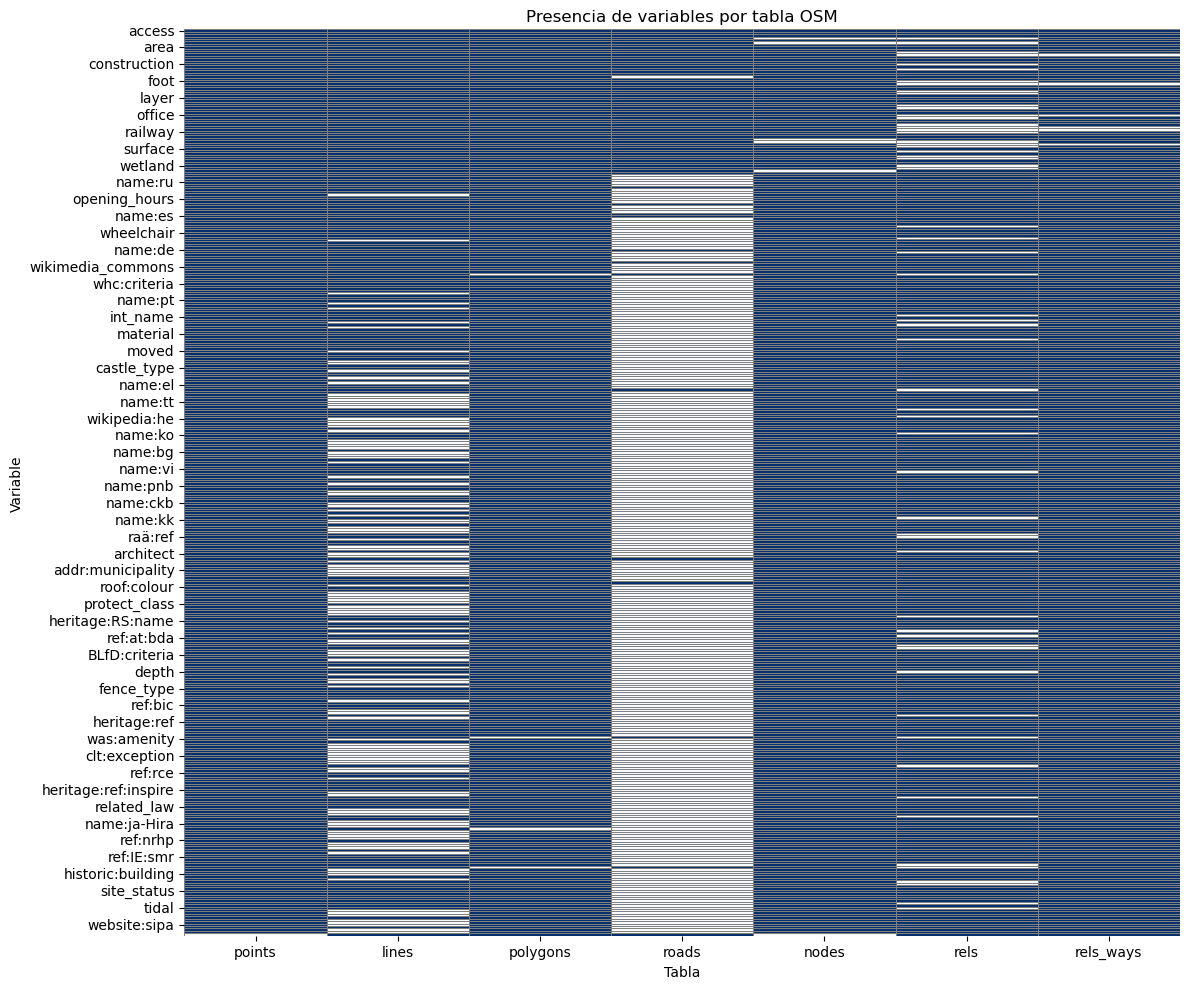

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Solo variables presentes en al menos 5 tablas
df_heatmap = df_presencia[df_presencia["conteo_tablas"] >= 5]

# Quitar columna de conteo para visualización
df_heatmap_viz = df_heatmap.drop(columns=["conteo_tablas"])

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_heatmap_viz, cmap="Blues", cbar=False, linewidths=0.5, linecolor='gray')
plt.title("Presencia de variables por tabla OSM")
plt.xlabel("Tabla")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

Este bloque representa las variables más completas por tabla, excluyendo aquellas de tipo estructural como osm_id, lat, lon, way o z_order, que siempre están presentes pero no aportan información analítica directamente interpretable.
Las variables excluidas son metadatos necesarios para la organización interna del modelo geoespacial, pero no constituyen atributos cualitativos o cuantitativos del objeto en sí. Por ello, se filtran para centrarse exclusivamente en etiquetas descriptivas útiles (como name, historic, wikidata, place, etc.).
El gráfico resultante refleja únicamente las variables que contienen información semántica o clasificatoria que puede ser analizada, visualizada o filtrada.

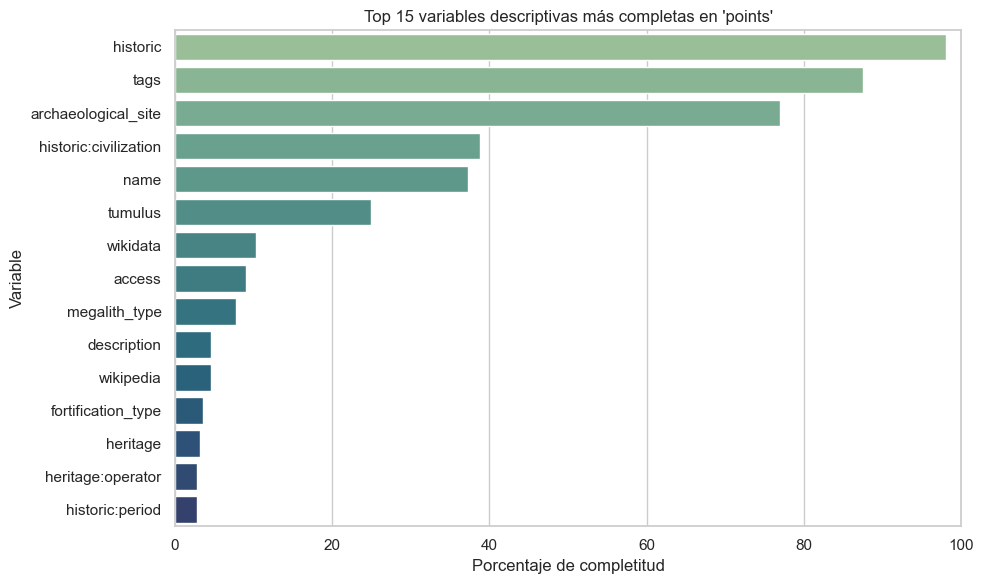

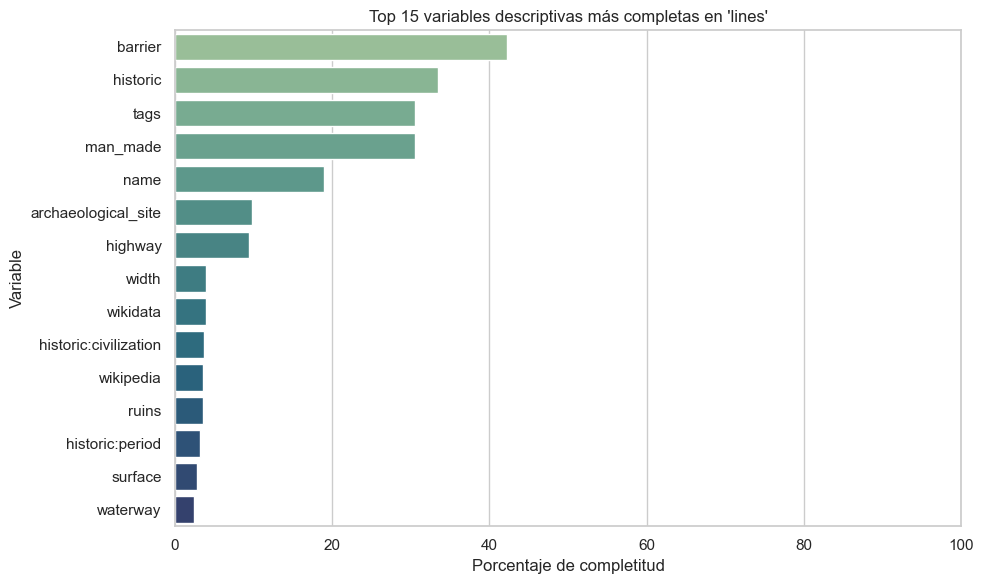

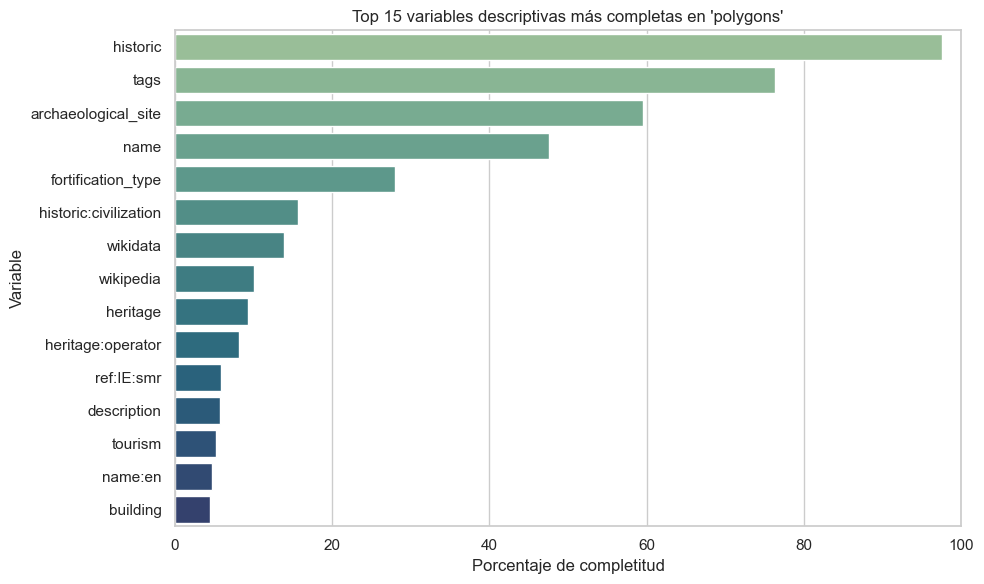

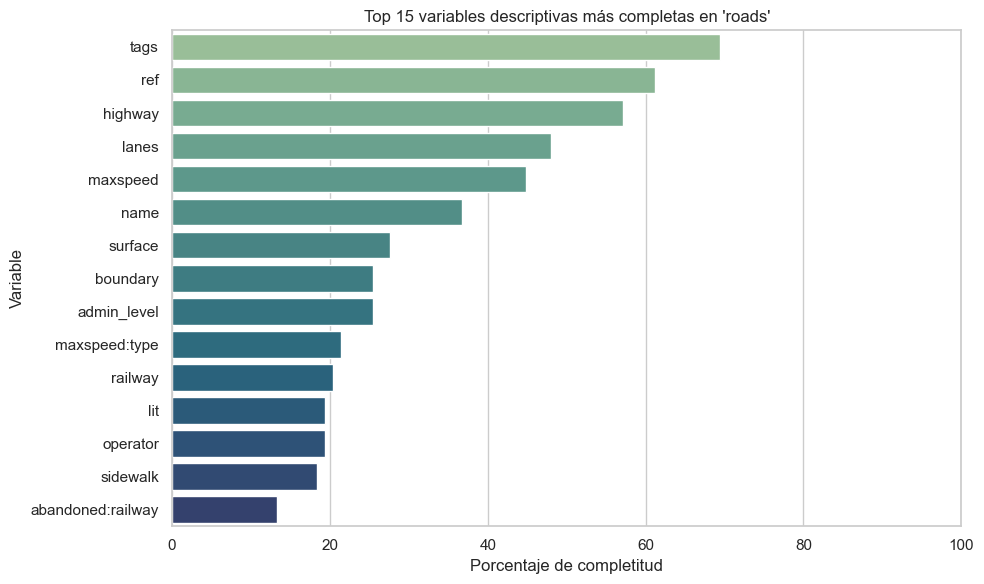

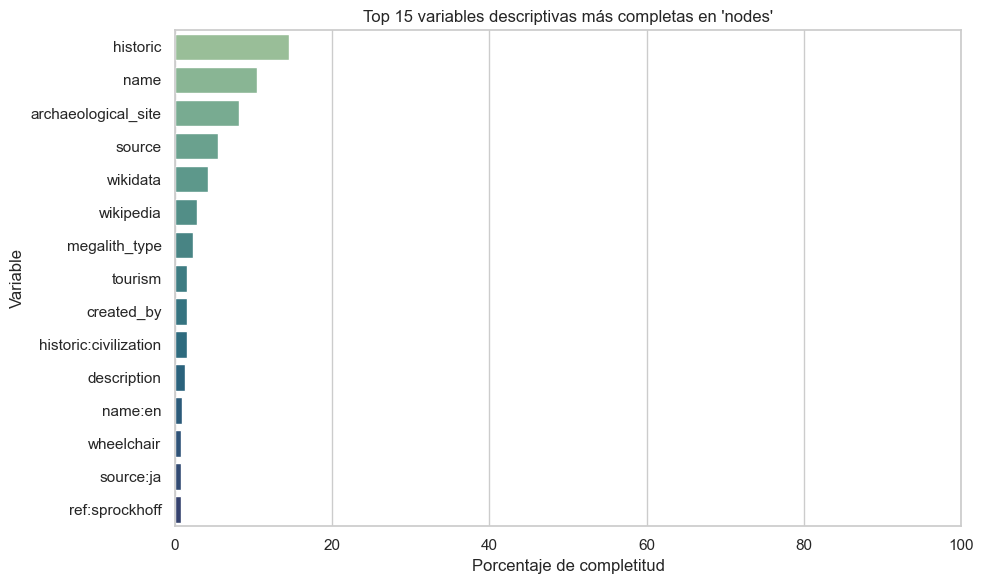

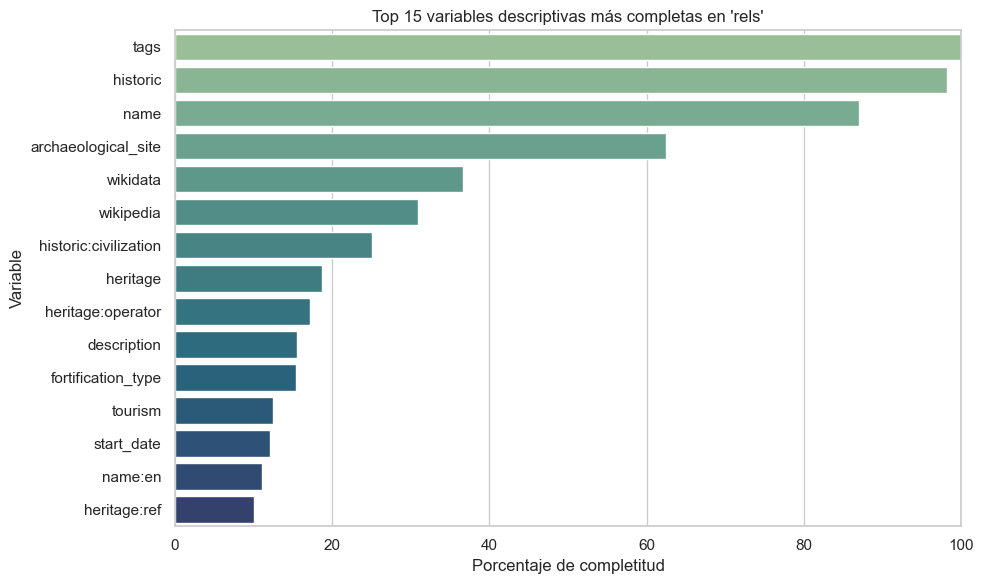

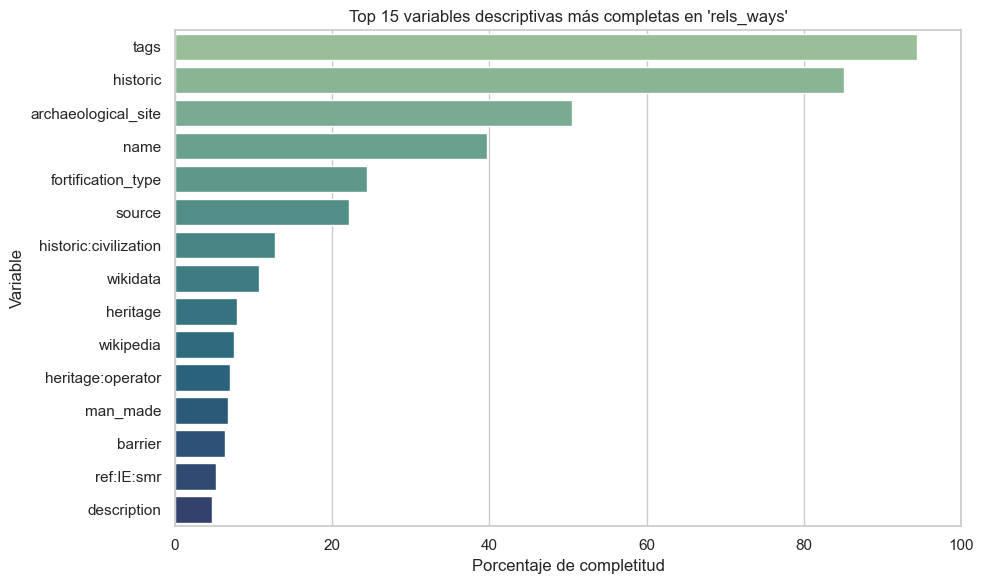

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráfico
sns.set(style="whitegrid")

# Lista de columnas estructurales a excluir
excluir_vars = [
    "osm_id", "id", "lat", "lon", "way", "z_order",
    "way_area", "type", "members", "nodes"
]

# Para cada tabla, mostrar las 15 variables más completas excluyendo estructurales
tablas_orden = resumen_completo["tabla"].unique()

for tabla in tablas_orden:
    df_tabla = resumen_completo[
        (resumen_completo["tabla"] == tabla) &
        (~resumen_completo["variable"].isin(excluir_vars))
    ]
    
    top = df_tabla.sort_values(by="porcentaje", ascending=False).head(15)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=top, x="porcentaje", y="variable", palette="crest")
    plt.title(f"Top 15 variables descriptivas más completas en '{tabla}'")
    plt.xlabel("Porcentaje de completitud")
    plt.ylabel("Variable")
    plt.xlim(0, 100)
    plt.tight_layout()
    plt.show()



In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de seaborn
sns.set(style="whitegrid")

# Reutilizamos el DataFrame 'resumen_completo' si ya lo tienes
tablas_orden = resumen_completo["tabla"].unique()

# Ruta donde quieres guardar los gráficos
ruta_salida = "/Users/severinodonate/Downloads/EDA/graficos_completitud/"

import os
os.makedirs(ruta_salida, exist_ok=True)

for tabla in tablas_orden:
    df_tabla = resumen_completo[resumen_completo["tabla"] == tabla]

    # Excluir variables estructurales obvias
    excluir = ["osm_id", "way", "way_area", "tags", "id", "lat", "lon", "type", "members", "nodes"]
    df_tabla = df_tabla[~df_tabla["variable"].isin(excluir)]

    top = df_tabla.sort_values(by="porcentaje", ascending=False).head(15)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=top, x="porcentaje", y="variable", palette="viridis")
    plt.title(f"Top 15 variables más completas en '{tabla}'")
    plt.xlabel("Porcentaje de completitud")
    plt.ylabel("Variable")
    plt.xlim(0, 100)
    plt.tight_layout()

    # Guardar la imagen
    nombre_archivo = f"{ruta_salida}completitud_{tabla}.png"
    plt.savefig(nombre_archivo, dpi=300)

    plt.close()  # Cerrar para no sobrecargar memoria


In [12]:
# Este bloque permite analizar la distribución de valores de una variable concreta dentro de una tabla. En este caso, se analiza la variable historic dentro de la tabla points, lo que permite identificar qué categorías históricas están más representadas.
# Se cuentan las apariciones de cada valor, incluyendo los nulos (dropna=False) para tener una visión completa. Esta información es útil para detectar etiquetas dominantes (archaeological_site, ruins, etc.), así como categorías residuales o errores de etiquetado.
# Este análisis cualitativo se puede aplicar a cualquier otra variable relevante del conjunto, como name, wikidata, heritage, place, entre otras.

df = tablas["points"]

# Ver valores más frecuentes en la variable 'historic'
df["historic"].value_counts(dropna=False).head(20)

archaeological_site    145131
NaN                      2929
stone                     214
tomb                      112
city_gate                  29
ruins                      29
yes                        27
standing_stone             14
memorial                   11
monument                    9
mine_shaft                  7
boundary_stone              6
castle                      3
rune_stone                  3
bridge                      2
quarry                      1
Rath                        1
battlefield                 1
hollow_way                  1
gallows                     1
Name: historic, dtype: int64

La variable historic recoge el tipo de elemento con valor histórico asignado por los colaboradores de OpenStreetMap. Al analizar su distribución de frecuencia, se observa que el valor más común es archaeological_site, con un total de 145.131 ocurrencias. Este valor representa yacimientos arqueológicos y constituye el núcleo de la información histórica en el dataset, al menos en esta variable.

Existen otros valores relevantes pero con mucha menor frecuencia, como stone, tomb, ruins, city_gate, memorial o castle, que indican distintos tipos de estructuras históricas. Algunos de estos valores tienen un significado técnico o local, como rune_stone, Rath o hollow_way.

También se detectan 2.929 casos sin valor (NaN), lo que representa elementos donde la etiqueta historic existe pero no ha sido asignado un valor. Esta proporción es baja en relación con el total y no compromete la utilidad analítica del campo.

En conjunto, esta variable presenta una alta cobertura y es útil para la categorización de objetos históricos, especialmente para la identificación y análisis de sitios arqueológicos.

Este bloque permite analizar la distribución de valores de una variable concreta dentro de una tabla. En este caso, se analiza la variable historic dentro de la tabla points, lo que permite identificar qué categorías históricas están más representadas.
Se cuentan las apariciones de cada valor, incluyendo los nulos (dropna=False) para tener una visión completa. Esta información es útil para detectar etiquetas dominantes (archaeological_site, ruins, etc.), así como categorías residuales o errores de etiquetado.
Este análisis cualitativo se puede aplicar a cualquier otra variable relevante del conjunto, como name, wikidata, heritage, place, entre otras.

In [15]:
df = tablas["points"]  # o "nodes", "polygons", etc.

# Contar valores únicos en la columna 'wikidata'
frecuencia_wikidata = df["wikidata"].value_counts(dropna=False)
frecuencia_wikidata.head(20)  # Opcional: ver las primeras 20

NaN           133191
Q146924           39
Q106370273        25
Q28051811         14
Q1917052          14
Q97602812         13
Q1371834          13
Q1652135          13
Q98173699         11
Q1917047          11
Q950572           11
Q739507           10
Q19834685          9
Q98173700          9
Q98398813          8
Q1549706           8
Q1404118           8
Q1548109           7
Q5024069           7
Q65952676          6
Name: wikidata, dtype: int64

Interpretación de la variable wikidata
La variable wikidata contiene los identificadores únicos de elementos en Wikidata, lo que permite vincular los objetos de OpenStreetMap con entidades externas estructuradas, como artículos de Wikipedia o bases de datos de patrimonio.

En este caso, se observa una alta dispersión de valores, ya que la mayoría de los identificadores aparecen una sola vez. Esto es esperable, dado que cada código Wikidata (QXXXXX) corresponde a un objeto específico (por ejemplo, un monumento, sitio arqueológico o lugar histórico).

Además, se registran una gran cantidad de valores NaN, es decir, elementos sin vinculación con Wikidata. Esto puede deberse a:

Falta de mapeo por parte de la comunidad.
Dificultad para identificar la correspondencia exacta con Wikidata.
O, simplemente, elementos que no tienen equivalente en dicha base de datos.
Aunque la cobertura general de esta variable es baja en proporción al total, su presencia resulta extremadamente valiosa para integrar información externa, enriquecer análisis semánticos o generar visualizaciones interactivas con enlaces a Wikipedia.

In [17]:
def analizar_variable(tabla, variable, top_n=20):
    df = tablas[tabla]
    return df[variable].value_counts(dropna=False).head(top_n)

# Ejemplo de uso
analizar_variable("points", "historic")


archaeological_site    145131
NaN                      2929
stone                     214
tomb                      112
city_gate                  29
ruins                      29
yes                        27
standing_stone             14
memorial                   11
monument                    9
mine_shaft                  7
boundary_stone              6
castle                      3
rune_stone                  3
bridge                      2
quarry                      1
Rath                        1
battlefield                 1
hollow_way                  1
gallows                     1
Name: historic, dtype: int64

Interpretación de la variable name
La variable name recoge el nombre propio asignado a los objetos de OpenStreetMap. Es una de las etiquetas más universales y sirve para representar lugares, sitios de interés, edificios o entidades geográficas de manera comprensible para el usuario.

En este análisis, se observa una alta diversidad de valores, lo que indica que la mayoría de los objetos etiquetados con name tienen un identificador único (como el nombre de un sitio o monumento). Sin embargo, también se repiten algunos nombres comunes, como "Castle", "Ruins" o "Chapel", en diferentes ubicaciones.

Una proporción significativa de registros aparece con valor nulo (NaN), lo que indica objetos que no han sido nombrados o que representan elementos genéricos sin denominación formal. Esta ausencia puede ser atribuida a:

Elementos aún no editados por la comunidad.
Lugares genéricos sin nombre individual.
Errores o limitaciones en la extracción desde OpenStreetMap.
Pese a estas ausencias, la variable name es crucial para tareas como identificación visual en mapas, generación de etiquetas, vinculación con bases de datos externas, y análisis de contribuciones comunitarias.

Este bloque genera un resumen estadístico de cada variable contenida en una tabla concreta del conjunto de datos. Para cada atributo, se calcula:
El número de valores no nulos (valores_no_nulos)
El número de valores únicos (valores_distintos)
El valor más frecuente (valor_mas_comun)
La frecuencia de ese valor (frecuencia_mas_comun)
Se excluyen variables estructurales como tags, geom, way y way_area, que no contienen contenido semántico directamente analizable.
Este resumen permite detectar atributos con baja utilidad (por ejemplo, dominados por un solo valor), identificar campos relevantes para visualizaciones, y valorar la calidad y diversidad de la información presente en la tabla.

In [18]:
df = tablas["points"]  # Puedes cambiar por "nodes", etc.

resumen_vars = []

for col in df.columns:
    if col in ["tags", "geom", "way", "way_area"]:  # Ignorar campos no analíticos
        continue
    
    serie = df[col].dropna()
    if len(serie) == 0:
        continue
    
    mas_comun = serie.value_counts().idxmax()
    frecuencia = serie.value_counts().max()
    
    resumen_vars.append({
        "variable": col,
        "valores_no_nulos": serie.count(),
        "valores_distintos": serie.nunique(),
        "valor_mas_comun": mas_comun,
        "frecuencia_mas_comun": frecuencia
    })

resumen_df = pd.DataFrame(resumen_vars).sort_values(by="valores_no_nulos", ascending=False)
resumen_df.head(20)


,variable,valores_no_nulos,valores_distintos,valor_mas_comun,frecuencia_mas_comun
0,osm_id,148537,148537,10588525931,1
23,historic,145608,25,archaeological_site,145131
57,archaeological_site,114287,397,tumulus,83592
72,historic:civilization,57639,499,neolithic,32311
32,name,55452,45697,Tumulus,298
196,tumulus,37095,16,round_tomb,30538
55,wikidata,15346,14782,Q146924,39
1,access,13463,14,yes,12343
63,megalith_type,11568,60,menhir,4886
59,description,6804,4109,Mámoa,677


Este bloque genera un resumen estadístico detallado de todas las variables presentes en el conjunto de datos expandido. Para cada variable, en cada tabla (points, lines, nodes, etc.), se calcula:
El número de valores no nulos (valores_no_nulos)
El número de valores únicos (valores_distintos)
El valor más común y su frecuencia (valor_mas_comun, frecuencia_mas_comun)
Se excluyen variables estructurales (tags, geom, way, way_area) que no aportan contenido semántico.
Este resumen es clave para identificar variables relevantes, valores dominantes, atributos vacíos o redundantes, y tomar decisiones informadas sobre limpieza, visualización y análisis.

In [19]:
resumen_general = []

for nombre_tabla, df in tablas.items():
    for col in df.columns:
        if col in ["tags", "geom", "way", "way_area"]:  # Excluye columnas estructurales
            continue
        
        serie = df[col].dropna()
        if len(serie) == 0:
            continue
        
        mas_comun = serie.value_counts().idxmax()
        frecuencia = serie.value_counts().max()
        
        resumen_general.append({
            "tabla": nombre_tabla,
            "variable": col,
            "valores_no_nulos": serie.count(),
            "valores_distintos": serie.nunique(),
            "valor_mas_comun": mas_comun,
            "frecuencia_mas_comun": frecuencia
        })

resumen_df = pd.DataFrame(resumen_general).sort_values(by=["tabla", "valores_no_nulos"], ascending=[True, False])


In [20]:
print(f"{len(resumen_df)} variables analizadas")

4981 variables analizadas


In [21]:
# GUARDA EL RESUMEN

resumen_df.to_csv("/Users/severinodonate/Downloads/EDA_resumen_completo.csv", index=False, sep=";")

Además del análisis basado en el porcentaje de completitud por variable, se ha generado una visualización complementaria que representa el número absoluto de valores no nulos por variable en cada tabla (points, nodes, lines, etc.).
En este caso, se excluyen las variables de tipo estructural (osm_id, id, lat, lon, way, etc.), que aunque siempre están completas, no aportan información temática directa.
Este enfoque permite identificar qué variables aportan más volumen de datos reales, independientemente del tamaño de la tabla. Por ejemplo, una variable con 50% de cobertura en una tabla de 100.000 filas es probablemente más útil que una variable con 100% de cobertura en una tabla de solo 200 filas.
Por tanto, esta visualización aporta una perspectiva complementaria al análisis de porcentaje, ayudando a priorizar atributos no solo por su completitud relativa, sino también por su peso efectivo en el conjunto de datos.

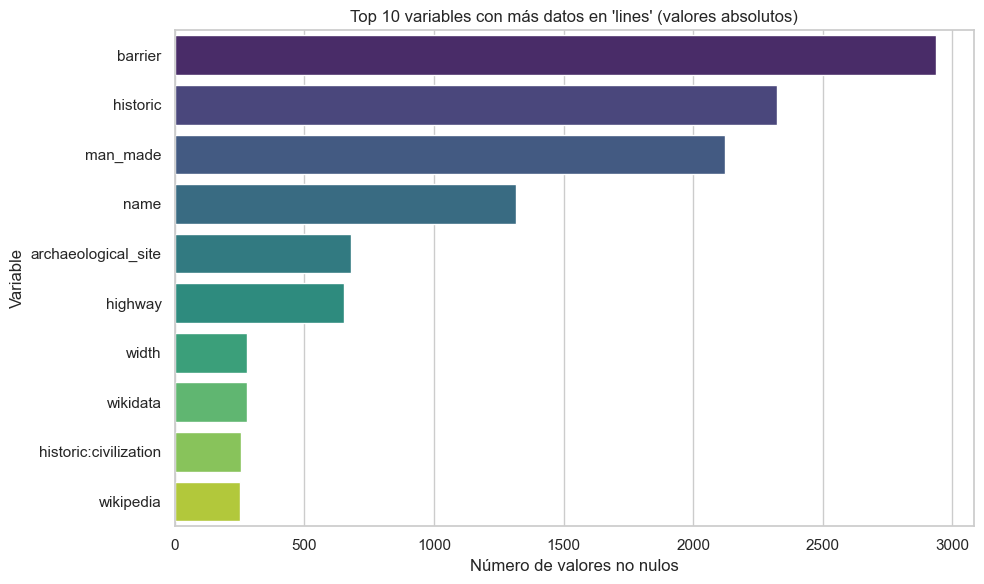

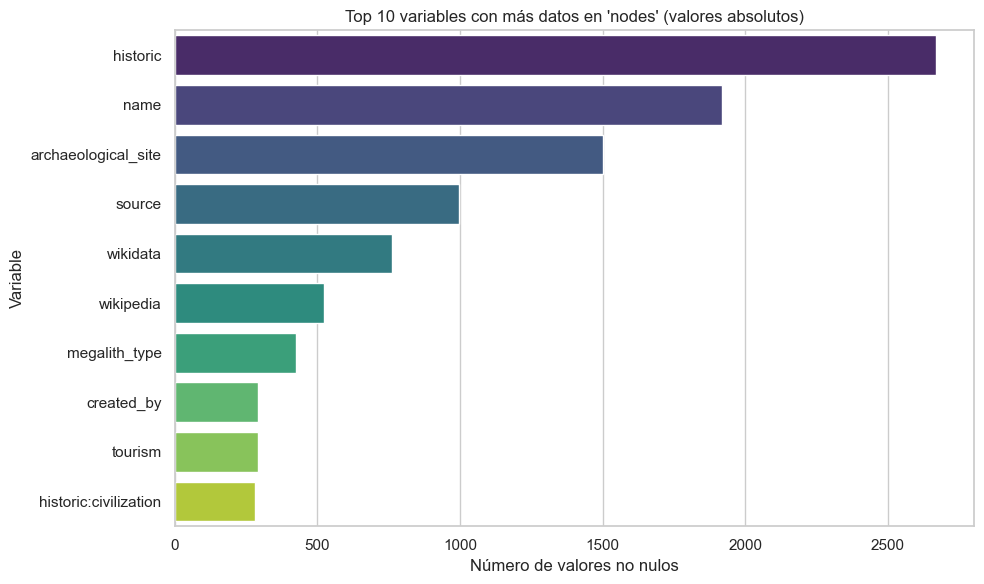

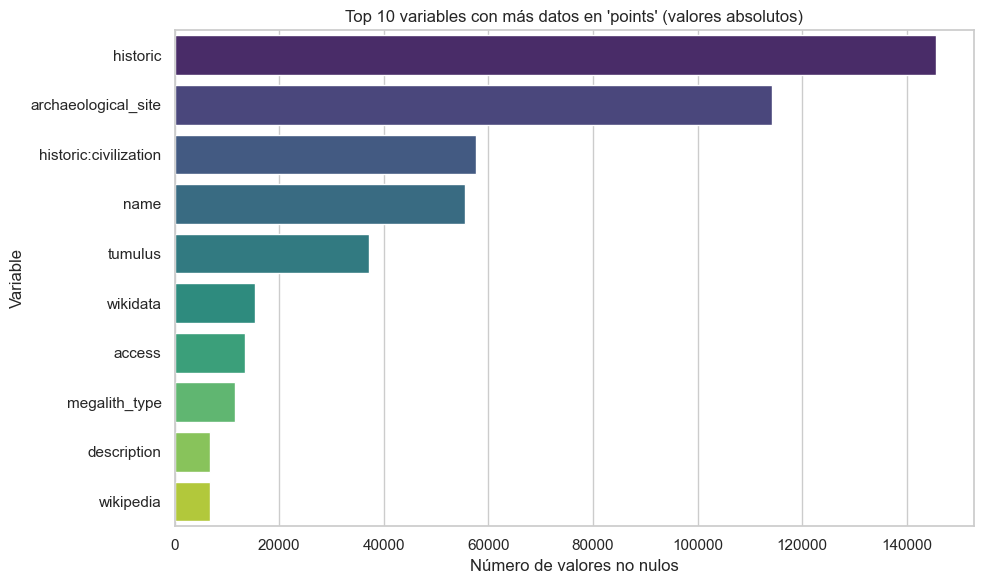

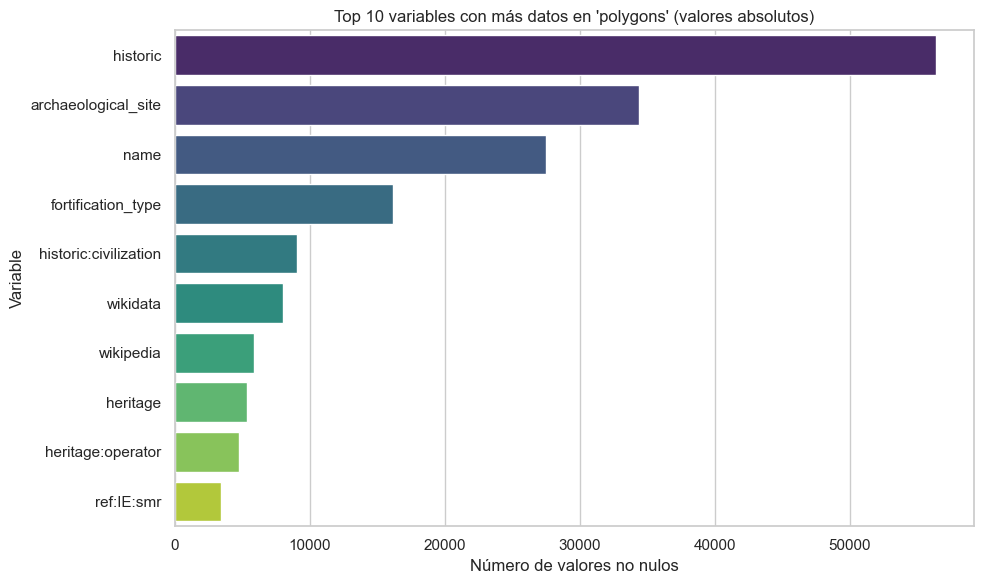

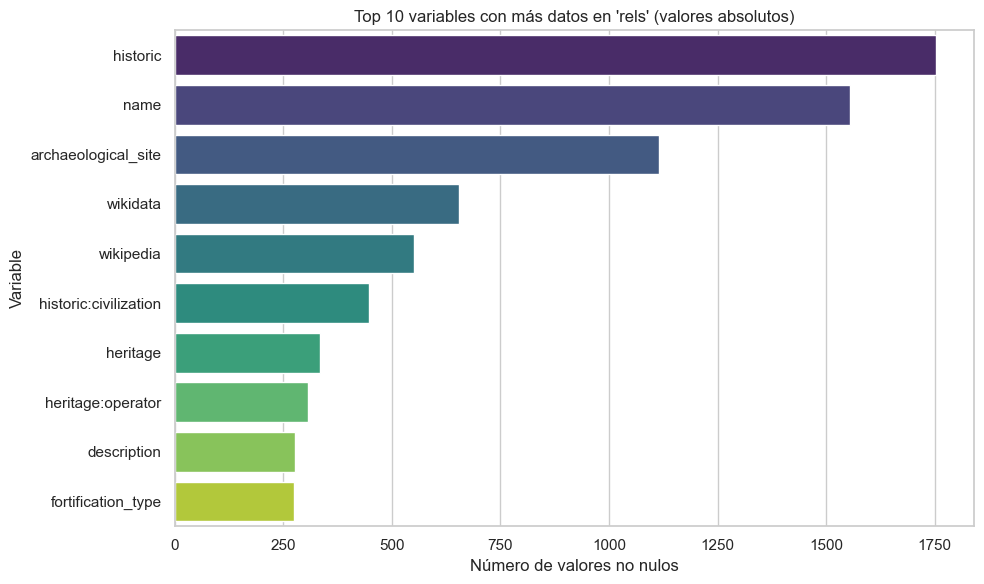

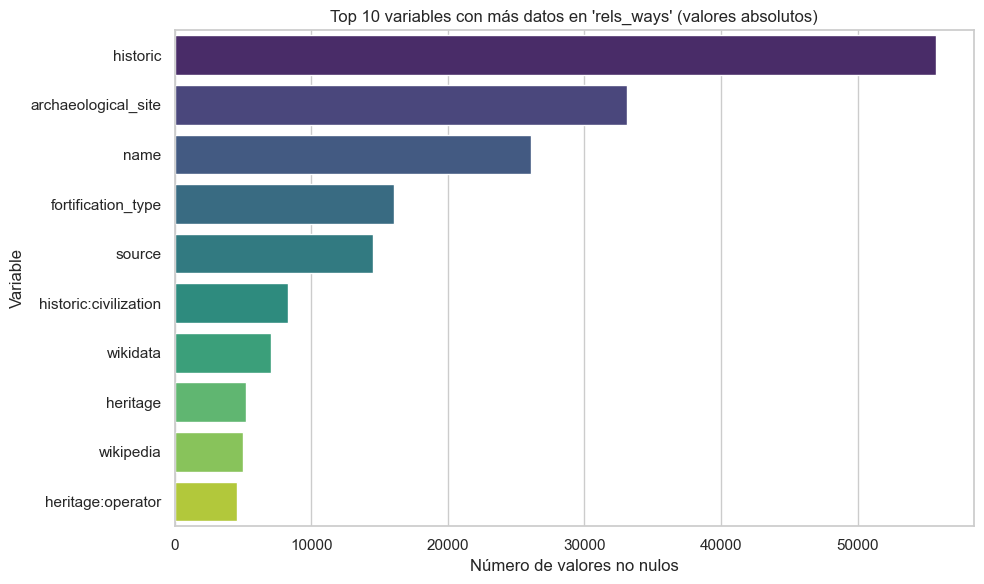

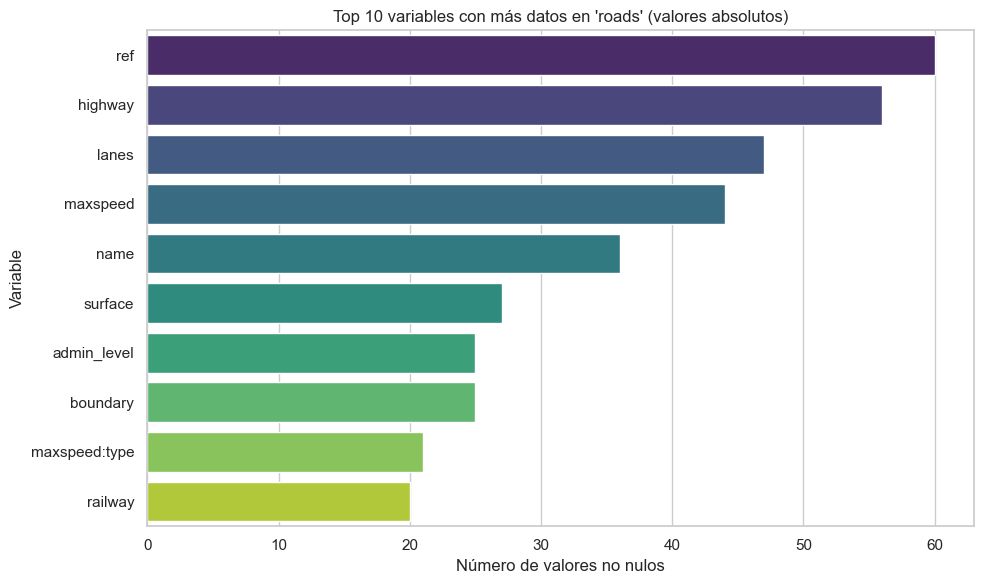

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráfico y nueva paleta
sns.set(style="whitegrid", palette="viridis")

# Lista de variables estructurales a excluir
excluir = ["osm_id", "id", "lat", "lon", "way", "z_order", "way_area", "type", "members", "nodes", "tags", "geom"]

# Listado de tablas en orden
tablas_ordenadas = resumen_df["tabla"].unique()

for tabla in tablas_ordenadas:
    df_tabla = resumen_df[resumen_df["tabla"] == tabla]
    df_tabla = df_tabla[~df_tabla["variable"].isin(excluir)]  # Aplicar filtro
    top_vars = df_tabla.sort_values(by="valores_no_nulos", ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_vars, x="valores_no_nulos", y="variable", palette="viridis")
    plt.title(f"Top 10 variables con más datos en '{tabla}' (valores absolutos)")
    plt.xlabel("Número de valores no nulos")
    plt.ylabel("Variable")
    plt.tight_layout()
    plt.show()

Este gráfico representa las 15 variables descriptivas con mayor volumen de información en el conjunto completo de datos, considerando todas las tablas (points, lines, nodes, etc.).
Para evitar distorsiones, se han excluido variables estructurales como osm_id, id, lat, lon o way, ya que no aportan contenido temático directamente interpretable.
La visualización permite detectar atributos transversales, es decir, variables que aparecen de forma sistemática y con muchos valores, como name, wikidata, historic, place, etc. Estas etiquetas son candidatas prioritarias para filtros, análisis o visualización cartográfica.
Este enfoque complementa las visualizaciones anteriores centradas en porcentajes por tabla, y permite priorizar variables por su peso real en el conjunto de datos global.

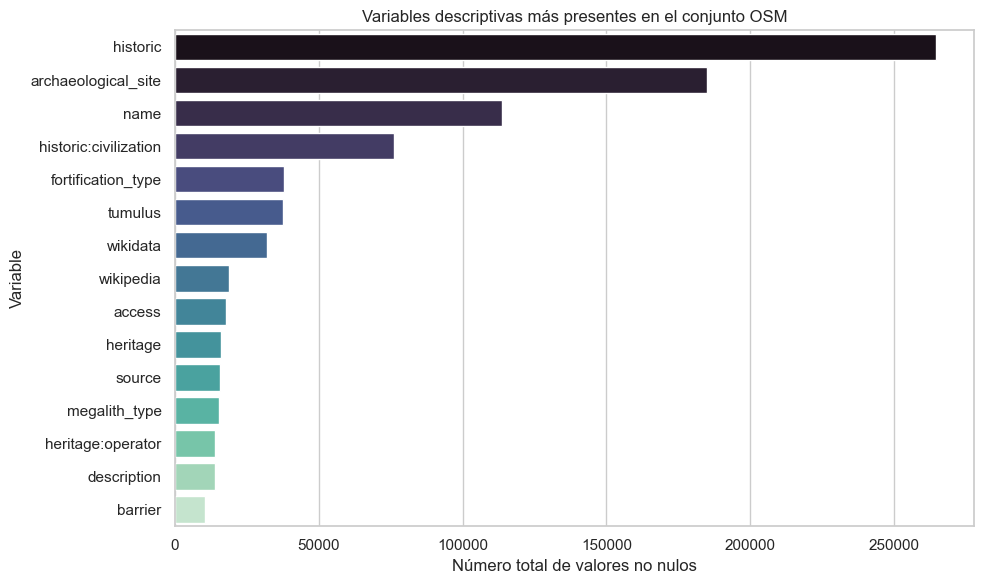

In [23]:
# Lista de variables estructurales a excluir
excluir = ["osm_id", "id", "lat", "lon", "way", "z_order", "way_area", "type", "members", "nodes", "tags", "geom"]

# Filtrar variables válidas para el análisis global
resumen_filtrado = resumen_df[~resumen_df["variable"].isin(excluir)]

# Agrupar por variable y sumar valores no nulos
top_global = (
    resumen_filtrado.groupby("variable")["valores_no_nulos"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=top_global.values, y=top_global.index, palette="mako")
plt.title("Variables descriptivas más presentes en el conjunto OSM")
plt.xlabel("Número total de valores no nulos")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

Esta visualización identifica las variables que presentan una cobertura inferior al 1% en sus respectivas tablas. Se excluyen aquellas de tipo estructural (ID, geometría, relaciones internas), y se consideran únicamente las variables descriptivas.
Estas etiquetas con muy baja cobertura suelen ser candidatas a:
Ser descartadas por irrelevancia estadística
Agruparse o fusionarse con otras
Revisarse en origen por problemas de codificación
La representación se limita a las 15 más frecuentes entre las de baja cobertura, lo que permite priorizar revisiones y decidir con mayor fundamento qué columnas excluir del análisis principal.

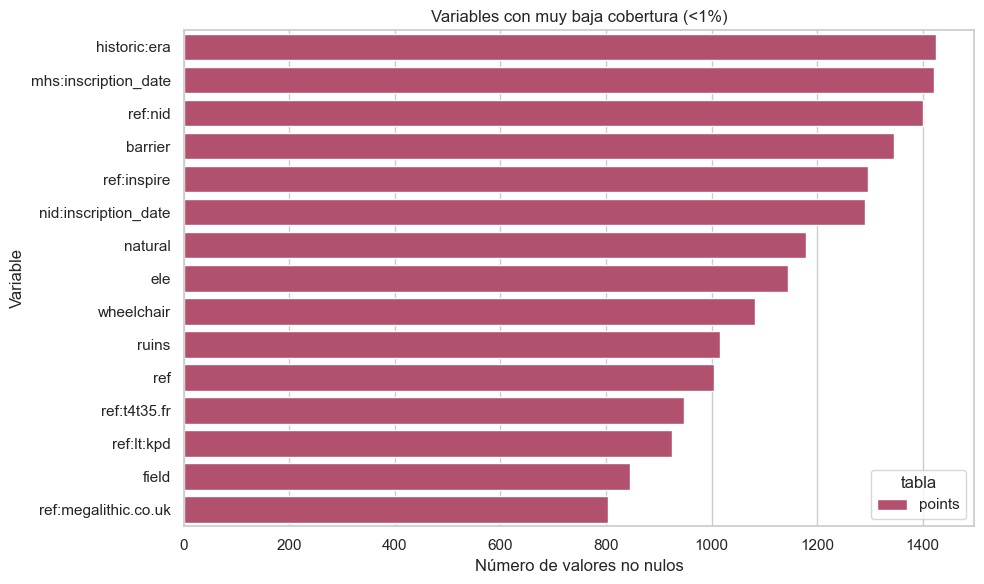

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear el campo 'porcentaje' de cobertura
num_filas_por_tabla = {nombre: len(tablas[nombre]) for nombre in tablas.keys()}
resumen_df["total_filas"] = resumen_df["tabla"].map(num_filas_por_tabla)
resumen_df["porcentaje"] = (resumen_df["valores_no_nulos"] / resumen_df["total_filas"] * 100).round(2)

# 2. Excluir variables estructurales
excluir = ["osm_id", "id", "lat", "lon", "way", "z_order", "way_area", "type", "members", "nodes", "tags", "geom"]
resumen_filtrado = resumen_df[~resumen_df["variable"].isin(excluir)]

# 3. Filtrar variables con muy baja cobertura (< 1%)
bajas = resumen_filtrado[resumen_filtrado["porcentaje"] < 1]

# 4. Mostrar las más frecuentes (por valores no nulos)
top_bajas = bajas.sort_values(by="valores_no_nulos", ascending=False).head(15)

# 5. Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(data=top_bajas, x="valores_no_nulos", y="variable", hue="tabla", dodge=False, palette="flare")
plt.title("Variables con muy baja cobertura (<1%)")
plt.xlabel("Número de valores no nulos")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


Este gráfico resume el número de variables por tabla según su nivel de cobertura. Las variables se han clasificado previamente en tres grupos:
Para conservar: cobertura superior al 5%
Para descartar: cobertura inferior al 1%
Indefinido: entre 1% y 5%
Esta representación permite tener una visión clara de la calidad y utilidad potencial de los datos por tipo de geometría (points, nodes, polygons, etc.). El color verde destaca atributos fuertes, el rojo alerta sobre columnas con escasa utilidad, y el gris indica áreas intermedias que podrían requerir revisión adicional.
Este gráfico facilita la toma de decisiones sobre limpieza, selección de atributos y diseño posterior de visualizaciones y filtros.

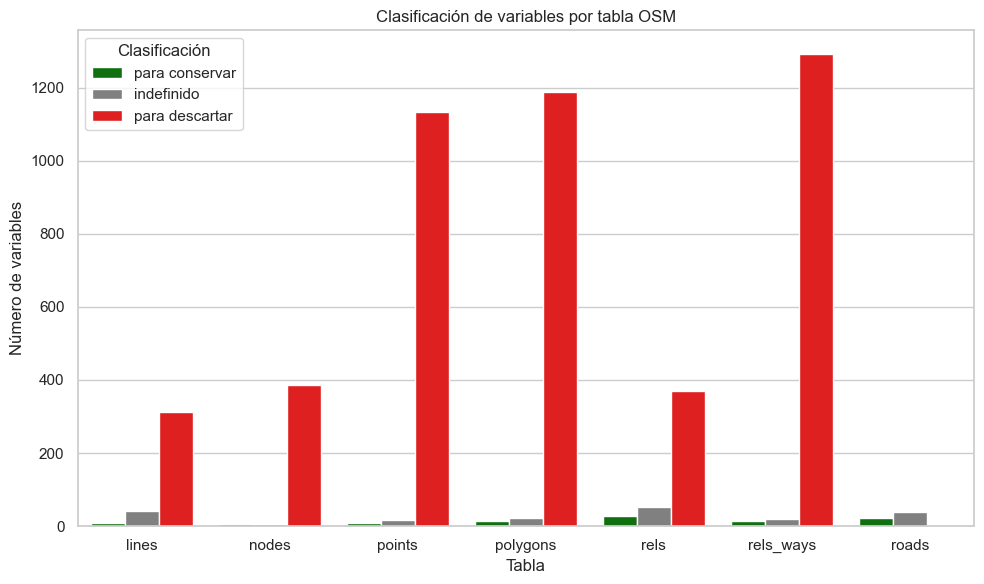

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar: número de variables por tabla y clasificación
clasificacion_resumen = (
    resumen_df.groupby(["tabla", "clasificacion"])
    .size()
    .reset_index(name="conteo")
)

# Ordenar clasificación para mantener coherencia visual
clasificacion_resumen["clasificacion"] = pd.Categorical(
    clasificacion_resumen["clasificacion"],
    categories=["para conservar", "indefinido", "para descartar"],
    ordered=True
)

# Gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.barplot(
    data=clasificacion_resumen,
    x="tabla",
    y="conteo",
    hue="clasificacion",
    palette={"para conservar": "green", "indefinido": "gray", "para descartar": "red"}
)

plt.title("Clasificación de variables por tabla OSM")
plt.xlabel("Tabla")
plt.ylabel("Número de variables")
plt.legend(title="Clasificación")
plt.tight_layout()
plt.show()


Este gráfico representa la coocurrencia de etiquetas dentro de una misma tabla (en este caso, points). Cada celda indica cuántas veces dos variables aparecen juntas en la misma fila.
Esta visualización permite identificar relaciones semánticas frecuentes, como por ejemplo que historic y wikidata suelen acompañarse, o que name aparece a menudo con place.
La matriz se construye detectando la presencia de variables (no nulas) y multiplicando la matriz binaria consigo misma (Aᵗ × A). Se excluyen columnas estructurales.

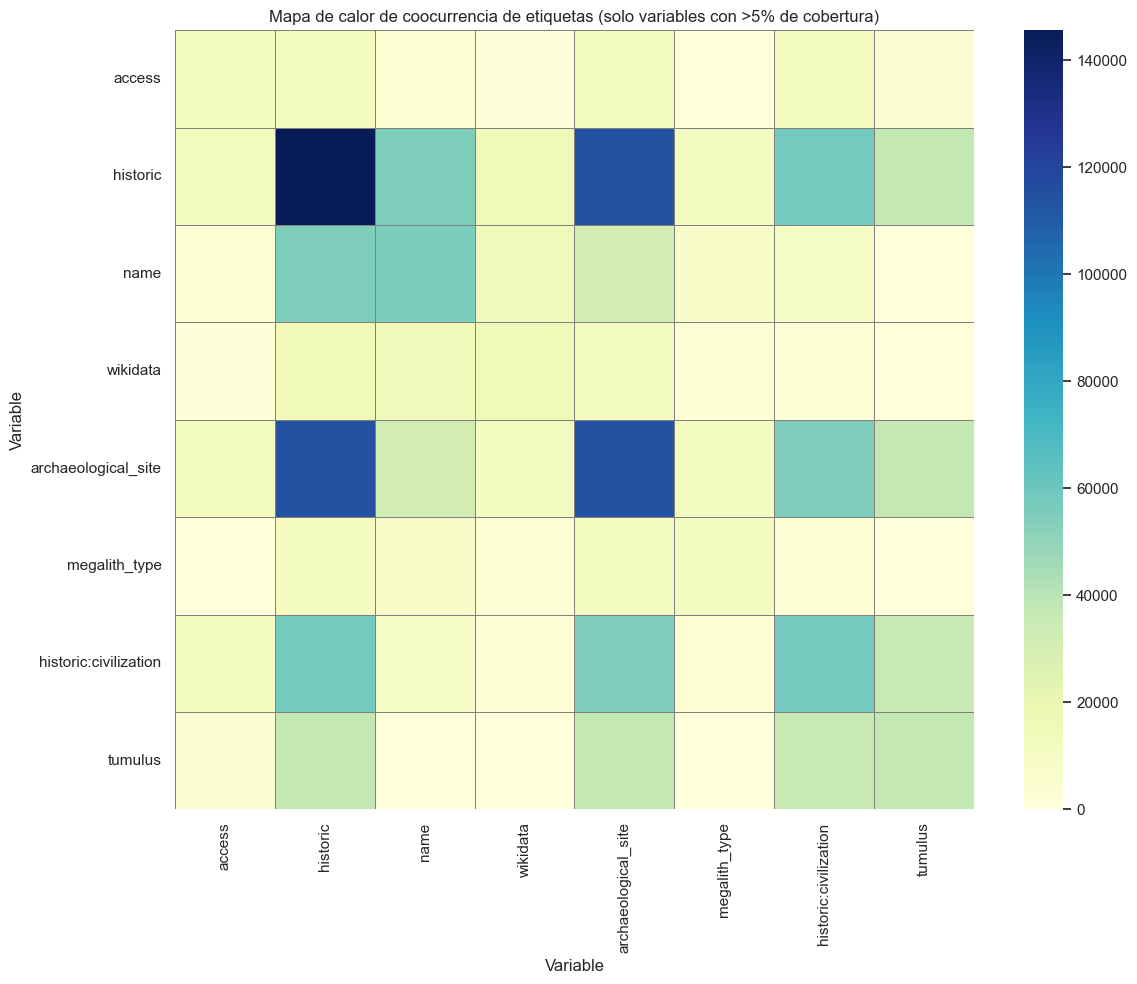

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona una tabla representativa
df = tablas["points"]

# Excluye columnas estructurales
excluir = ["osm_id", "id", "lat", "lon", "way", "z_order", "way_area", "type", "members", "nodes", "tags", "geom"]
columnas_candidatas = [col for col in df.columns if col not in excluir]

# Filtra columnas con al menos un 5% de cobertura
columnas_utiles = [col for col in columnas_candidatas if df[col].notna().mean() > 0.05]

# Crear matriz binaria de presencia
matriz_binaria = df[columnas_utiles].notna().astype(int)

# Calcular coocurrencia
coocurrencia = matriz_binaria.T.dot(matriz_binaria)

# Visualizar
plt.figure(figsize=(12, 10))
sns.heatmap(coocurrencia, cmap="YlGnBu", linewidths=0.5, linecolor="gray")
plt.title("Mapa de calor de coocurrencia de etiquetas (solo variables con >5% de cobertura)")
plt.xlabel("Variable")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

Este gráfico muestra la distribución geográfica de los nodos con datos (latitud y longitud disponibles). Se representa una muestra aleatoria de puntos sobre un sistema de coordenadas geográficas (EPSG:4326).
Esta visualización ayuda a identificar zonas densas con alta concentración de información, así como áreas vacías o mal etiquetadas. Es útil para planificar visualizaciones cartográficas temáticas posteriores.

In [32]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 5.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.9/286.9 kB 21.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... one
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 14.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 54.3 MB/s eta 0:00:00
  Created wheel for pyogrio: filename=pyogrio-0.11.0-cp39-cp39-macosx_10_9_x86_64.whl size=600874 sha256=e9093a7d18b8daec58bc09d109eaaf4c9c447b8c1a93a72c6c8c230141ac5efe
  Stored in directory: /Users/severinodonate/Library/Caches/pip/wheels/b3/d0/51/6529c7a4b917869adcb07848f94f24b237be3bd278e0b427d2
Successfully built pyogrio


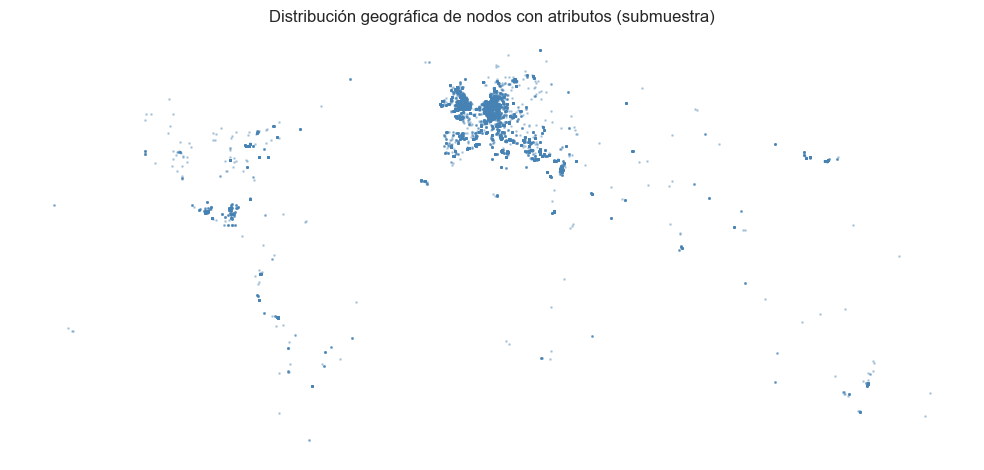

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Usamos la tabla 'nodes', que suele tener coordenadas
df = tablas["nodes"]

# Asegurarse de que tiene columnas 'lon' y 'lat'
df_geo = df[df["lon"].notna() & df["lat"].notna()]

# Crear GeoDataFrame
gdf = gpd.GeoDataFrame(df_geo, geometry=gpd.points_from_xy(df_geo["lon"], df_geo["lat"]), crs="EPSG:4326")

# Simplificamos: mostramos solo un subconjunto aleatorio si hay muchas filas
if len(gdf) > 50000:
    gdf = gdf.sample(50000, random_state=1)

# Graficar
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=1, alpha=0.3, color="steelblue")
plt.title("Distribución geográfica de nodos con atributos (submuestra)")
plt.axis("off")
plt.tight_layout()
plt.show()

Este diagrama de Sankey representa cómo las variables clave (name, wikidata, historic, etc.) se distribuyen entre las diferentes tablas del conjunto de datos (points, nodes, polygons, etc.).
El ancho de cada enlace es proporcional al número de veces que una etiqueta aparece en la tabla correspondiente. De esta forma, se puede observar de manera intuitiva en qué estructuras se concentran ciertos tipos de información.
Esta visualización es útil para analizar la distribución semántica transversal del conjunto OSM y detectar redundancias o especializaciones por geometría.

In [34]:
!pip install plotly

In [49]:
import plotly.io as pio
pio.renderers.default = "browser"

In [50]:
import plotly.graph_objects as go

# Variables clave
etiquetas_clave = ["name", "wikidata", "historic", "place", "website"]

# Crear lista de nodos
nodos = list(tablas.keys()) + etiquetas_clave
nodo_indices = {n: i for i, n in enumerate(nodos)}

# Crear enlaces
enlaces = []

for tabla, df in tablas.items():
    for etiqueta in etiquetas_clave:
        if etiqueta in df.columns and df[etiqueta].notna().sum() > 0:
            enlaces.append({
                "source": nodo_indices[tabla],
                "target": nodo_indices[etiqueta],
                "value": int(df[etiqueta].notna().sum())
            })

# Convertir en listas para Sankey
sources = [e["source"] for e in enlaces]
targets = [e["target"] for e in enlaces]
values = [e["value"] for e in enlaces]

# Crear diagrama Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=nodos
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(title_text="Relación entre tablas y etiquetas clave", font_size=12)
fig.show()

In [48]:
import pandas as pd

# Diccionario con número de registros por tabla
num_filas = {nombre: len(df) for nombre, df in tablas.items()}

# Añadir columna con total de registros a resumen_df
resumen_df["total_registros"] = resumen_df["tabla"].map(num_filas)

# Recalcular cobertura en porcentaje si no la tienes ya
resumen_df["porcentaje"] = (resumen_df["valores_no_nulos"] / resumen_df["total_registros"]) * 100

# Generar resumen por tabla
tabla_resumen = (
    resumen_df.groupby("tabla")
    .agg(
        num_variables=("variable", "count"),
        total_registros=("total_registros", "first"),
        media_cobertura_pct=("porcentaje", "mean"),
        variables_mayor_50=("porcentaje", lambda x: (x > 50).sum()),
        variables_menor_1=("porcentaje", lambda x: (x < 1).sum())
    )
    .round(2)
    .reset_index()
)

tabla_resumen


,tabla,num_variables,total_registros,media_cobertura_pct,variables_mayor_50,variables_menor_1
0,lines,359,6949,1.27,2,311
1,nodes,399,18305,0.94,3,385
2,points,1159,148537,0.41,3,1132
3,polygons,1225,57777,0.50,4,1189
4,rels,450,1785,2.25,6,370
5,rels_ways,1327,65545,0.44,4,1292
6,roads,62,98,12.18,4,0
